In [2]:
from animl.trees import *
from animl.viz.trees import *
from IPython.display import Image, display_svg

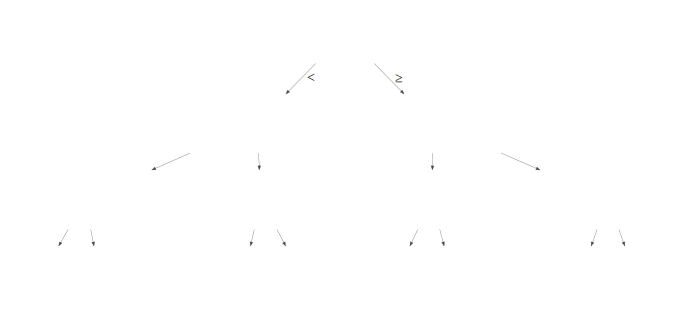

In [2]:
regr = tree.DecisionTreeRegressor(max_depth=3)
boston = load_boston()

X_train = boston.data
y_train = boston.target
regr = regr.fit(X_train, y_train)

st = dtreeviz(regr, X_train, y_train, target_name='price',
              feature_names=boston.feature_names)

g = graphviz.Source(st)
g

In [3]:
import pydotplus


pydot_graph = pydotplus.graph_from_dot_data(st)

Image(pydot_graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [4]:
from graphviz.backend import run

with open("/tmp/foo.dot", "w") as f:
    f.write(st)

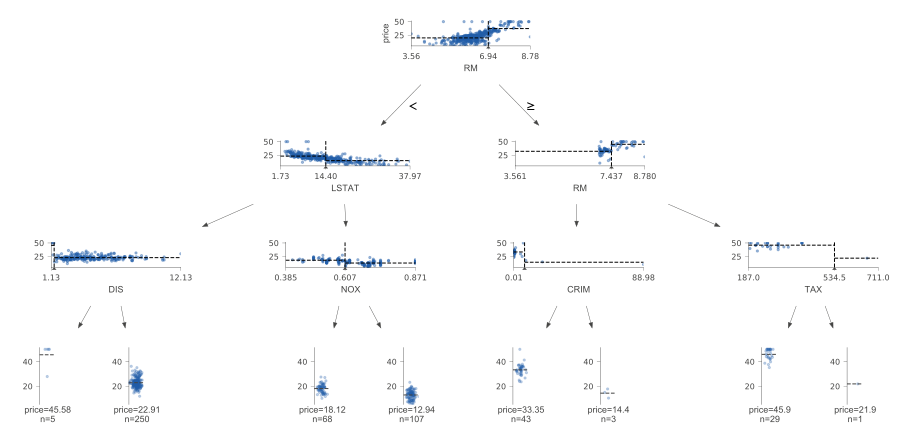

In [5]:
cmd = ["dot", "-Tpng", "-o", "/tmp/foo.png", "/tmp/foo.dot"]
stdout, stderr = run(cmd, capture_output=True, check=True)
Image("/tmp/foo.png")

In [6]:
cmd = ["dot", "-Tsvg", "-o", "/tmp/foo.svg", "/tmp/foo.dot"]
stdout, stderr = run(cmd, capture_output=True, check=True)

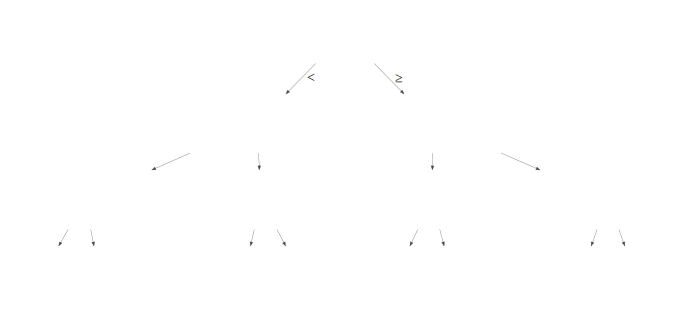

In [7]:
with open("/tmp/foo.svg") as f:
    svg = f.read()

svg = svg.replace('xlink:href="', 'href="file://')
with open("/tmp/bar.svg", "w") as f:
    f.write(svg)
    
#display(IPython.display.SVG("/tmp/bar.svg"))
IPython.display.SVG(svg)

In [8]:
IPython.display.SVG("""
<svg xmlns="http://www.w3.org/2000/svg"
  xmlns:xlink="http://www.w3.org/1999/xlink">
  <svg x="10">
    <rect x="10" y="10" height="100" width="100"
        style="stroke:#ff0000; fill: #0000ff"/>
  </svg>
  <svg x="200">
    <rect x="10" y="10" height="100" width="100"
        style="stroke:#009900; fill: #00cc00"/>
  </svg>
</svg>
""")

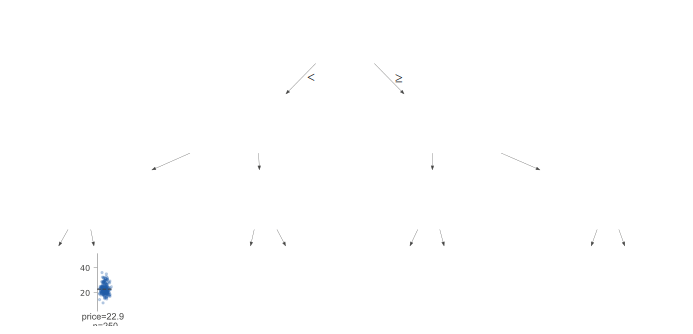

In [3]:
display(IPython.display.SVG("/tmp/foo.svg"))